In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import glob
import re
from mpl_toolkits.mplot3d import Axes3D

sns.set_theme(style="whitegrid")

,Spheres,Resolution,Time
0,1,400x400,0.040967
1,1,400x400,0.042850
2,1,400x400,0.039844
3,1,400x400,0.040956
4,1,400x400,0.040220
...,...,...,...
445,9,400x400,0.677014
446,9,400x400,0.687907
447,9,400x400,0.681578
448,9,400x400,0.732931


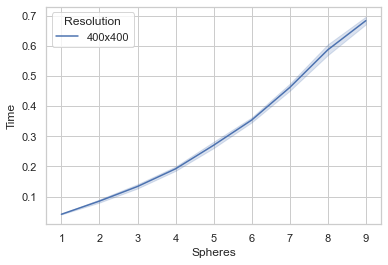

In [4]:
joined_files = os.path.join("CPU_*_400x400.csv")
joined_list = glob.glob(joined_files)
# tips2 = pd.read_csv('test1.csv')
tips2 = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)
tips2.to_csv("CPU_400x400")
# tips2["Time"] = tips2["Time"].astype("double")
display(tips2)



ax = sns.lineplot(x="Spheres", y="Time", hue="Resolution", data=tips2)
# ax.set_yscale("log") # use log    

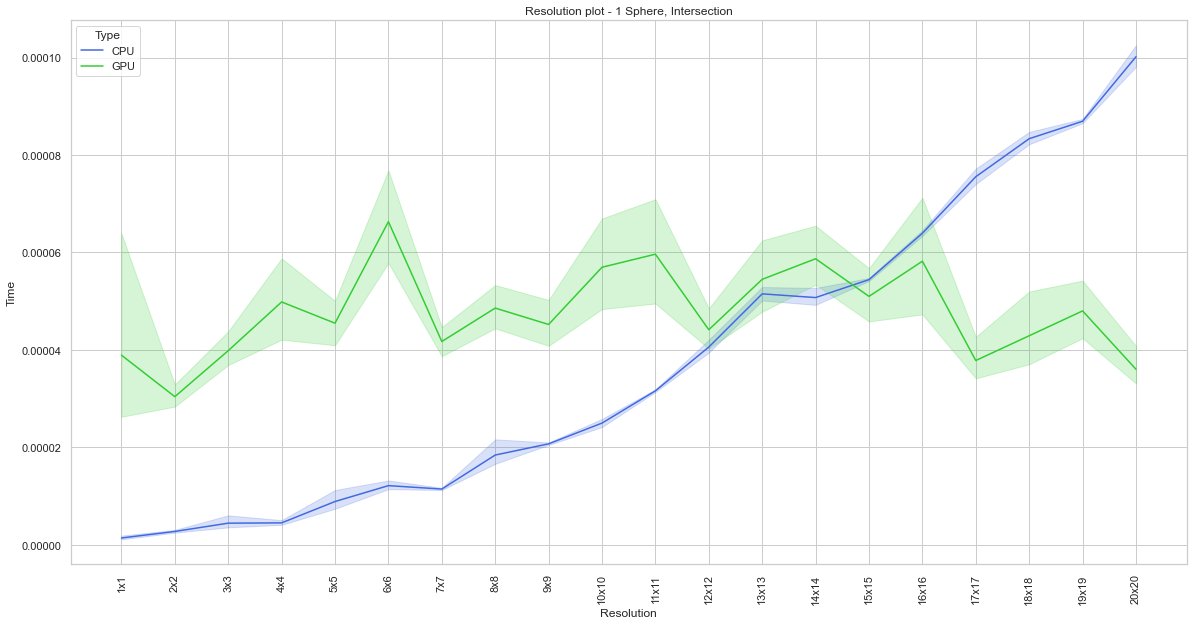

In [16]:
joined_files = os.path.join("CPU/1_sphere_1-1000/1-20/*.csv")
joined_files2 = os.path.join("GPU/1_sphere_1-1000/1-20/*.csv")
joined_list = sorted(glob.glob(joined_files))
joined_list2 = glob.glob(joined_files2)
# display(joined_list)
# tips2 = pd.read_csv('test1.csv')
CPU = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)
GPU = pd.concat(map(pd.read_csv, joined_list2), ignore_index=True)


search = []    
for values in CPU['Resolution']:
    search.append(re.search(r'(\d+)x', values).group(1))
CPU['Width'] = search
CPU['Width'] = CPU['Width'].astype('int')
CPU = CPU.sort_values(["Width"], ascending=[True])
# display(CPU)
# tips2["Time"] = tips2["Time"].astype("double")
# display(tips2)
search2 = []    
for values in GPU['Resolution']:
    search2.append(re.search(r'(\d+)x', values).group(1))
GPU['Width'] = search2
GPU['Width'] = GPU['Width'].astype('int')
GPU = GPU.sort_values(["Width"], ascending=[True])

CPU['Type'] = 'CPU'
GPU['Type'] = 'GPU'

plt.figure(figsize=(20,10))
ax = sns.lineplot(x="Resolution", y="Time", data=CPU, hue='Type', color='r', palette={'CPU':'royalblue','GPU':'limegreen'})
ax = sns.lineplot(x="Resolution", y="Time", data=GPU, hue='Type', color='g', palette={'CPU':'royalblue','GPU':'limegreen'})

ax.set(title="Resolution plot - 1 Sphere, Intersection")

# ax.set_yscale("log") # use log
# plt.show()    
plt.xticks(rotation=90);

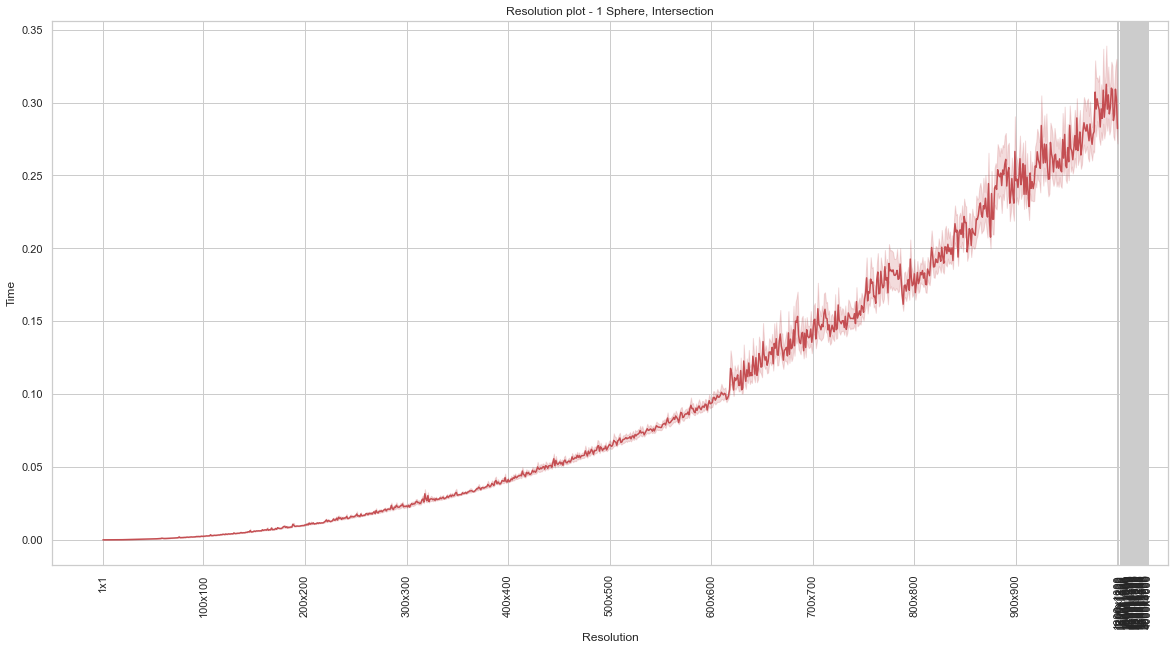

In [11]:
joined_files = os.path.join("CPU/1_sphere_1-1000/*.csv")
joined_list = sorted(glob.glob(joined_files))

CPU = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)



search = []    
for values in CPU['Resolution']:
    search.append(re.search(r'(\d+)x', values).group(1))
CPU['Width'] = search
CPU['Width'] = CPU['Width'].astype('int')
CPU = CPU.sort_values(["Width"], ascending=[True])



plt.figure(figsize=(20,10))
ax = sns.lineplot(x="Resolution", y="Time", data=CPU, color='r')

lennart = GPU["Resolution"].unique()[99::100]
lennart = np.insert(lennart, 0, '1x1', axis=0)
ax.set(xticks=lennart)
ax.set(title="Resolution plot - 1 Sphere, Intersection")

# ax.set_yscale("log") # use log
# plt.show()    
plt.xticks(rotation=90);

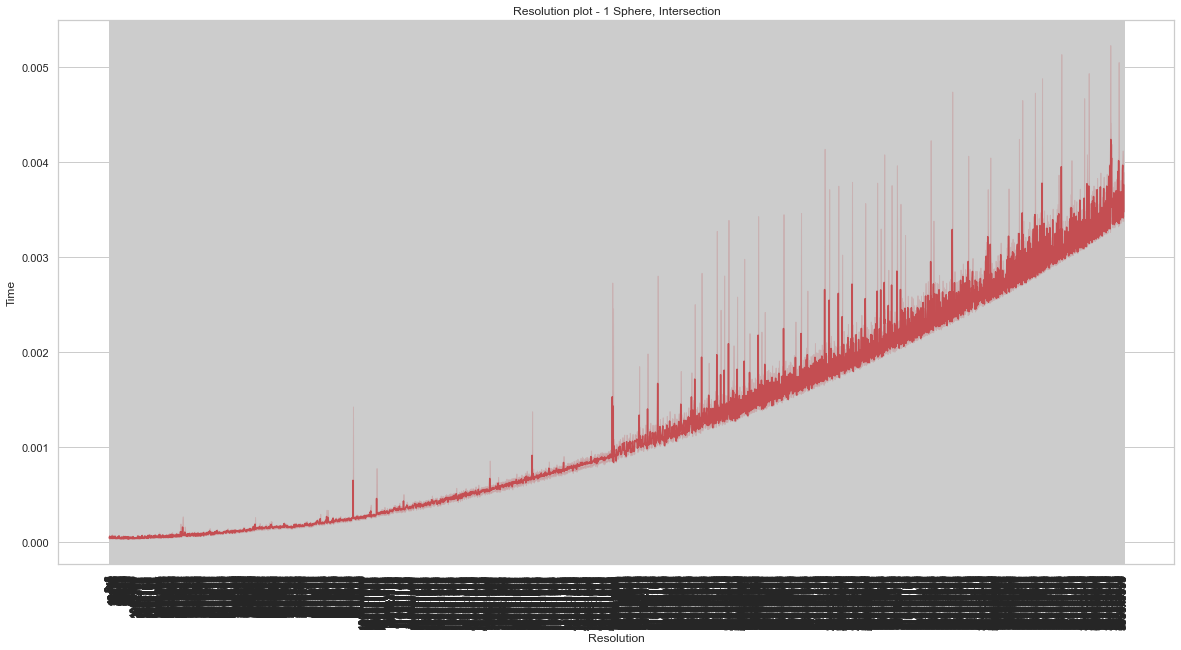

In [9]:
joined_files = os.path.join("GPU/1-4000/*.csv")
joined_list = sorted(glob.glob(joined_files))

GPU = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)



search = []    
for values in GPU['Resolution']:
    search.append(re.search(r'(\d+)x', values).group(1))
GPU['Width'] = search
GPU['Width'] = GPU['Width'].astype('int')
GPU = GPU.sort_values(["Width"], ascending=[True])

lennart = GPU["Resolution"].unique()[99::100]
lennart = np.insert(lennart, 0, '1x1', axis=0)

plt.figure(figsize=(20,10))
ax = sns.lineplot(x="Resolution", y="Time", data=GPU, color='r')
ax.set(xticks=lennart)

ax.set(title="Resolution plot - 1 Sphere, Intersection")

# ax.set_yscale("log") # use log
# plt.show()    
plt.xticks(rotation=90);

In [13]:
joined_files = os.path.join("CPU/1_sphere_1-1000/*.csv")
joined_files2 = os.path.join("GPU/1_sphere_1-1000/*.csv")
joined_list = sorted(glob.glob(joined_files))
joined_list2 = glob.glob(joined_files2)
# display(joined_list)
# tips2 = pd.read_csv('test1.csv')
CPU = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)
GPU = pd.concat(map(pd.read_csv, joined_list2), ignore_index=True)


# GPU = GPU.append({'Spheres':1,'Resolution':'0x0','Time':0}, ignore_index=True)
# CPU = CPU.append({'Spheres':1,'Resolution':'0x0','Time':0}, ignore_index=True)

search = []    
for values in CPU['Resolution']:
    search.append(re.search(r'(\d+)x', values).group(1))
CPU['Width'] = search
CPU['Width'] = CPU['Width'].astype('int')
CPU = CPU.sort_values(["Width"], ascending=[True])
# display(CPU)
# tips2["Time"] = tips2["Time"].astype("double")



search2 = []    
for values in GPU['Resolution']:
    search2.append(re.search(r'(\d+)x', values).group(1))
GPU['Width'] = search2
GPU['Width'] = GPU['Width'].astype('int')
GPU = GPU.sort_values(["Width"], ascending=[True])

CPU['Type'] = 'CPU'
GPU['Type'] = 'GPU'

['1x1' '10x10' '20x20' '30x30' '40x40' '50x50' '60x60' '70x70' '80x80'
 '90x90' '100x100' '110x110' '120x120' '130x130' '140x140' '150x150'
 '160x160' '170x170' '180x180' '190x190' '200x200' '210x210' '220x220'
 '230x230' '240x240' '250x250' '260x260' '270x270' '280x280' '290x290'
 '300x300' '310x310' '320x320' '330x330' '340x340' '350x350' '360x360'
 '370x370' '380x380' '390x390' '400x400' '410x410' '420x420' '430x430'
 '440x440' '450x450' '460x460' '470x470' '480x480' '490x490' '500x500'
 '510x510' '520x520' '530x530' '540x540' '550x550' '560x560' '570x570'
 '580x580' '590x590' '600x600' '610x610' '620x620' '630x630' '640x640'
 '650x650' '660x660' '670x670' '680x680' '690x690' '700x700' '710x710'
 '720x720' '730x730' '740x740' '750x750' '760x760' '770x770' '780x780'
 '790x790' '800x800' '810x810' '820x820' '830x830' '840x840' '850x850'
 '860x860' '870x870' '880x880' '890x890' '900x900' '910x910' '920x920'
 '930x930' '940x940' '950x950' '960x960' '970x970' '980x980' '990x990'
 '1000x1

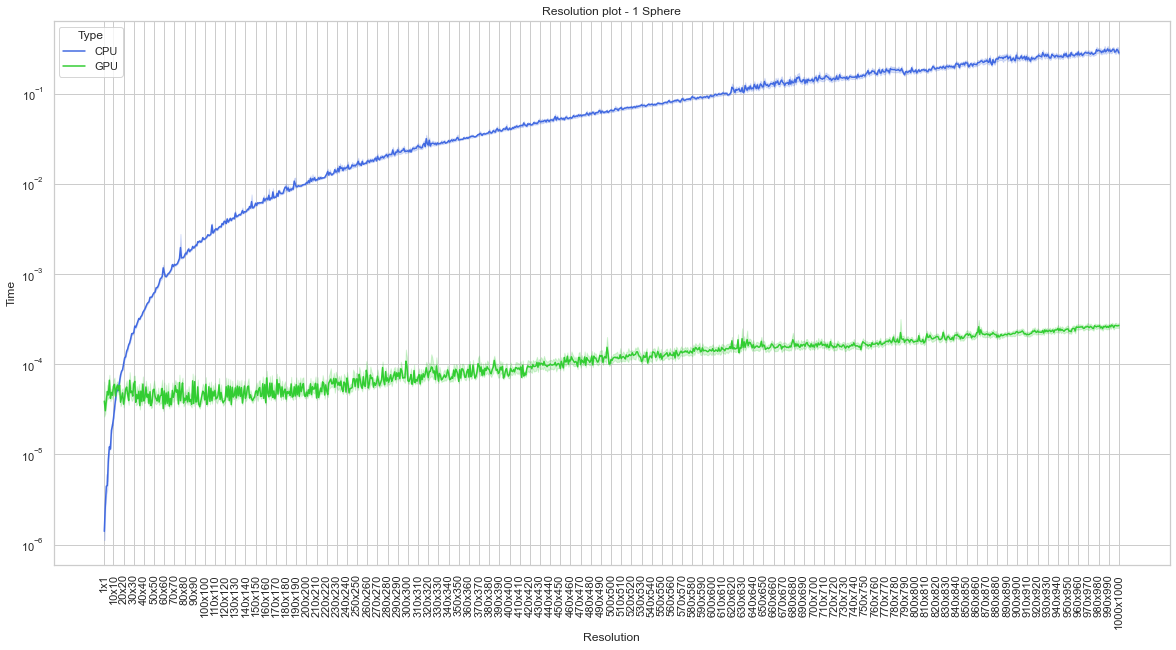

In [15]:



plt.figure(figsize=(20,10))
ax = sns.lineplot(x="Resolution", y="Time", data=CPU, hue='Type', color='r', palette={'CPU':'royalblue','GPU':'limegreen'})
ax = sns.lineplot(x="Resolution", y="Time", data=GPU, hue='Type', color='g', palette={'CPU':'royalblue','GPU':'limegreen'})

ax.set(title="Resolution plot - 1 Sphere")
lennart = GPU["Resolution"].unique()[9::10]
lennart = np.insert(lennart, 0, '1x1', axis=0)
print(lennart)

ax.set(xticks=lennart)


ax.set_yscale("log") # use log
# plt.show()    
plt.xticks(rotation=90);



     Spheres Resolution      Time Type
0          1    400x400  0.000211  GPU
1          1    400x400  0.000205  GPU
2          1    400x400  0.000146  GPU
3          1    400x400  0.000143  GPU
4          1    400x400  0.000072  GPU
..       ...        ...       ...  ...
445        9    400x400  0.660135  CPU
446        9    400x400  0.648987  CPU
447        9    400x400  0.695373  CPU
448        9    400x400  0.643669  CPU
449        9    400x400  0.673989  CPU

[900 rows x 4 columns]


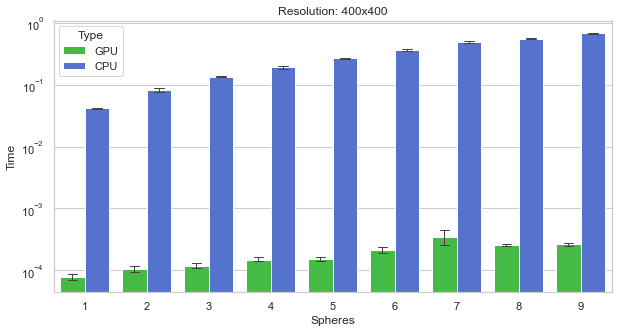

In [2]:
### ---CPU & GPU Bar CPU --- ###
    ### --- 400x400 --- ###

CPU_files = os.path.join("CPU/*_sphere_1-*/400_CPU_*_400x400.csv")
CPU_list = sorted(glob.glob(CPU_files))

GPU_files = os.path.join("GPU/*_sphere_1-*/400_GPU_*_400x400.csv")
GPU_list = sorted(glob.glob(GPU_files))

CPU = pd.concat(map(pd.read_csv, CPU_list), ignore_index=True)
GPU = pd.concat(map(pd.read_csv, GPU_list), ignore_index=True)

CPU['Type'] = 'CPU'
GPU['Type'] = 'GPU'

plot = pd.concat([GPU, CPU])
print(plot)

plt.figure(figsize=(10,5))

pal = sns.set_palette("muted")

ax = sns.barplot(x="Spheres", y="Time", hue='Type', data=plot, palette={'CPU':'royalblue','GPU':'limegreen'}, errwidth=1, capsize=0.15)
# ax = sns.lineplot(x="Spheres", y="Time", hue='Type', data=GPU, palette={'CPU':'red','GPU':'green'})
ax.set(title="Resolution: 400x400")

ax.set_yscale("log") # use log
# plt.savefig("rövhål.png", dpi=400)

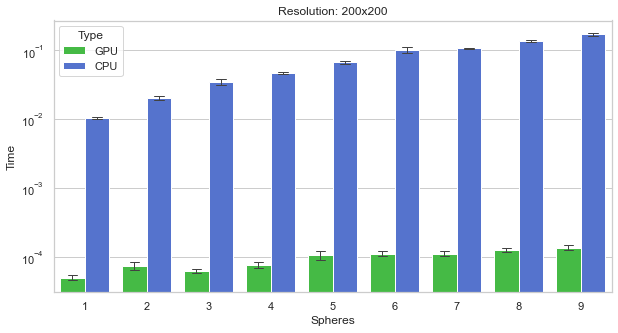

In [6]:
### ---CPU & GPU Bar CPU --- ###
    ### --- 200x200 --- ###

CPU_files = os.path.join("CPU/*_sphere_1-*/200_CPU_*_200x200.csv")
CPU_list = sorted(glob.glob(CPU_files))

GPU_files = os.path.join("GPU/*_sphere_1-*/200_GPU_*_200x200.csv")
GPU_list = sorted(glob.glob(GPU_files))


CPU = pd.concat(map(pd.read_csv, CPU_list), ignore_index=True)
GPU = pd.concat(map(pd.read_csv, GPU_list), ignore_index=True)

CPU['Type'] = 'CPU'
GPU['Type'] = 'GPU'

plot = pd.concat([GPU, CPU])

plt.figure(figsize=(10,5))

pal = sns.set_palette("muted")

ax = sns.barplot(x="Spheres", y="Time", hue='Type', data=plot, palette={'CPU':'royalblue','GPU':'limegreen'}, errwidth=1, capsize=0.15)
# ax = sns.lineplot(x="Spheres", y="Time", hue='Type', data=GPU, palette={'CPU':'red','GPU':'green'})
ax.set(title="Resolution: 200x200")

ax.set_yscale("log") # use log
# plt.savefig("rövhål.png", dpi=400)

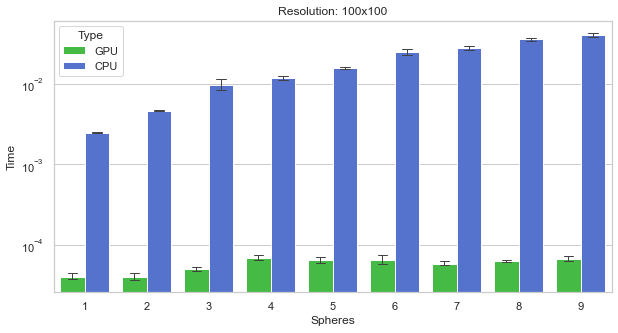

In [8]:
### ---CPU & GPU Bar CPU --- ###
    ### --- 100x100 --- ###

CPU_files = os.path.join("CPU/*_sphere_1-*/100_CPU_*_100x100.csv")
CPU_list = sorted(glob.glob(CPU_files))

GPU_files = os.path.join("GPU/*_sphere_1-*/100_GPU_*_100x100.csv")
GPU_list = sorted(glob.glob(GPU_files))


CPU = pd.concat(map(pd.read_csv, CPU_list), ignore_index=True)
GPU = pd.concat(map(pd.read_csv, GPU_list), ignore_index=True)

CPU['Type'] = 'CPU'
GPU['Type'] = 'GPU'

plot = pd.concat([GPU, CPU])

plt.figure(figsize=(10,5))

pal = sns.set_palette("muted")

ax = sns.barplot(x="Spheres", y="Time", hue='Type', data=plot, palette={'CPU':'royalblue','GPU':'limegreen'}, errwidth=1, capsize=0.15)
# ax = sns.lineplot(x="Spheres", y="Time", hue='Type', data=GPU, palette={'CPU':'red','GPU':'green'})
ax.set(title="Resolution: 100x100")

ax.set_yscale("log") # use log
# plt.savefig("rövhål.png", dpi=400)

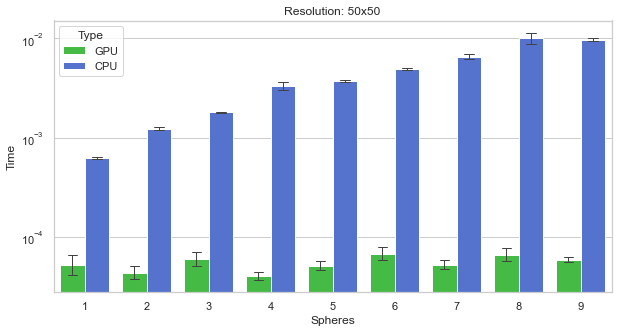

In [10]:
### ---CPU & GPU Bar CPU --- ###
    ### --- 50x50 --- ###

CPU_files = os.path.join("CPU/*_sphere_1-*/50_CPU_*_50x50.csv")
CPU_list = sorted(glob.glob(CPU_files))

GPU_files = os.path.join("GPU/*_sphere_1-*/50_GPU_*_50x50.csv")
GPU_list = sorted(glob.glob(GPU_files))


CPU = pd.concat(map(pd.read_csv, CPU_list), ignore_index=True)
GPU = pd.concat(map(pd.read_csv, GPU_list), ignore_index=True)

CPU['Type'] = 'CPU'
GPU['Type'] = 'GPU'

plot = pd.concat([GPU, CPU])

plt.figure(figsize=(10,5))

pal = sns.set_palette("muted")

ax = sns.barplot(x="Spheres", y="Time", hue='Type', data=plot, palette={'CPU':'royalblue','GPU':'limegreen'}, errwidth=1, capsize=0.15)
# ax = sns.lineplot(x="Spheres", y="Time", hue='Type', data=GPU, palette={'CPU':'red','GPU':'green'})
ax.set(title="Resolution: 50x50")

ax.set_yscale("log") # use log
# plt.savefig("rövhål.png", dpi=400)

In [7]:
CPU_files = os.path.join("CPU/*_sphere_1-400/*.csv")
CPU_list = sorted(glob.glob(CPU_files))

CPU = pd.concat(map(pd.read_csv, CPU_list), ignore_index=True)

search = []    
for values in CPU['Resolution']:
    search.append(re.search(r'(\d+)x', values).group(1))
CPU['Width'] = search
CPU['Width'] = CPU['Width'].astype('int')
CPU = CPU.sort_values(["Width"], ascending=[True])

ValueError: Argument Z must be 2-dimensional.

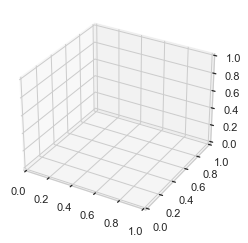

In [18]:
fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(CPU['Spheres'],CPU['Width'], CPU['Time'])